# Lab-2: Linear/Polynomial Regression.
_____
In this lab, you will Practice applying different Regression algorithms, and play with models to experiece underfitting vs. overfitting.

### Objectives:

1. Machine Learning Workflow
2. Simple Linear Regression
3. Multiple Linear Regression
4. Polynomial Regression



## Machine Learning Workflow

#### The High-level overview of the stages in the ML workflow can be:

1. Source and prepare your data.
2. Develop your model.
3. Train an ML model on your data:
 - Train model
 - Evaluate model accuracy
 - Tune hyper-parameters
4. Deploy your trained model.
5. Send prediction requests to your model
6. Monitor the predictions on an ongoing basis

## Regression
1. What is linear regression?
<span style="color:green">Regression searches for relationships among variables. Generally, in regression analysis, we usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, we try to establish a relation among them. The dependent features are called the dependent variables, outputs, or responses. The independent features are called the independent variables, inputs, or predictors.</span>
2. When Do We Need Regression?
<span style="color:green"> Typically, we need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, we can use it to determine if and to what extent the experience or gender impact salaries. </span>


## Linear Regression
1. What is linear regression?
<span style="color:green">When implementing linear regression of some dependent variable $ y $ on the set of independent variables $ \bold{x} $ = $( x_1 , …, x_r)$, where 𝑟 is the number of predictors, we assume a linear relationship between $ y $  and $ \bold{x} $ :  $ y $  =$\beta_0 + \beta_1 x_1 + .... + \beta_r x_r + \epsilon$. This equation is the regression equation. $\beta_0, \beta_1, ...., \beta_r $ are the regression coefficients, and $ \epsilon$ is the random irreducible error.

</span>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


##### Step 1. Reading & Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Plotting:
plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data:

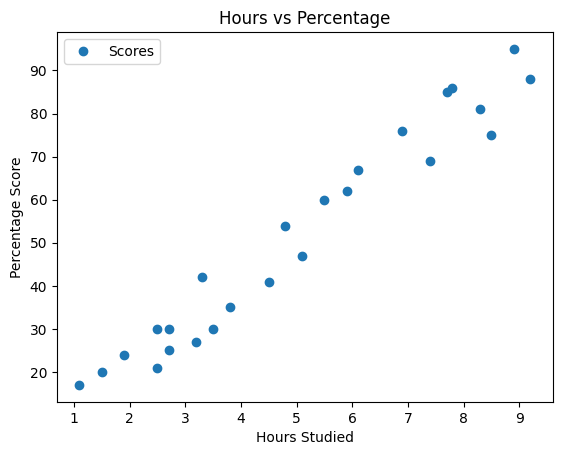

In [5]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Train/Test splitting

In [6]:
X = dataset.drop('Scores', axis=1)
y = dataset['Scores']

##### Task 1 Split the training data to train/test data with a ratio

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


##### Step 2 & 3. Build and fit Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

3.0312830386057854
[9.52038609]


##### Step 3.2 Evaluate the performance of the linear regression model on test dataset

In [9]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
20,30,28.736325
21,54,48.729136
22,35,39.208750
23,76,68.721947
24,86,77.290295


Q: What RMSE, MSE and R-squared tell us?
<span style="color:green"> Both RMSE and MSE tell us how much our predictions will be away from the truth on average.
$R^2$ tells us the proportion of the variance/variability in the Y was explained by the model via the explanatory variables.


### Coefficient of determination (R²)

It measures how well a statistical model predicts an outcome. The outcome is
represented by the model’s dependent variable.

The lowest possible value of R² is 0 and the highest possible value is 1. Put
simply, the better a model is at making predictions, the closer its R² will be to 1.

$R^2 = 1 - (RSS/TSS)$

where $RSS$ =  sum of squared residuals and $TSS$ = total sum of squares

##### Task 2: Write a function that takes the predicted output and the actual output and prints the MSE, RMSE, MAE and R
coefficient value

In [10]:
from sklearn import metrics


def print_metrics(y_actual, y_pred):
    MSE = metrics.mean_squared_error(y_actual, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_actual, y_pred)
    TSS = np.sum((y_actual-np.mean(y_actual))**2)
    RSS = np.sum((y_actual-y_pred)**2)
    R = (np.sqrt(1-(RSS/TSS)))
    print('MSE: ', MSE)
    print('RMSE: ', RMSE)
    print('MAE: ', MAE)
    print('R: ', R)


In [11]:
print_metrics(y_test, y_pred)

MSE:  35.18429566473721
RMSE:  5.931635159442733
MAE:  5.346209347444651
R:  0.962979333969398


### Multiple Linear Regression
Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the car price based on the model of the car, the horse-power, peak rpm, fuel type, etc.
We seek a model of the form:

$Y = A_0 * X_0 + A_1 * X_1 + A_2 * X_2 + A_3 * X_3 + A_4 * X_4.$

##### Step 1. Reading & Preparing Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
dataset = pd.read_csv('CarPrice_modified.csv')

X = dataset.drop('price', axis=1)
y = dataset['price']

dataset.head()

,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


First we need to Standardise our Training Data, specially the car name to encode them properly


##### Task 3. Get the brand name only without the model in CarName column and put it as the new CarName column

In [14]:
X.CarName = X.CarName.str.split(' ').str[0]
X.head()


,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22


In [15]:
X.CarName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

As you can see there are a lot of spelling mistakes, let's clean them

In [16]:
cleanup_nums = {"CarName": { "maxda": "mazda" , "porcshce": "porsche" , "Nissan": "nissan" , "vokswagen": "volkswagen", "toyouta" : "toyota", "vw" : "volkswagen"} }
X.replace(cleanup_nums, inplace=True)

In [17]:
X.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

You can see a lot of ordinal and nominal variables in this dataset

Nominal Variable (Categorical): Variable comprises a finite set of discrete values with no relationship between values.
Ordinal Variable: Variable comprises a finite set of discrete values with a ranked ordering between values.

We need to encode these variables using one of many encoding techniques including:
1- One-Hot encoding
2- Ordinal encoding
3- Cyclic encoding

#### Ordinal encoding
In ordinal encoding, each unique category value is assigned an integer value.
For example, "small" is 1, "medium" is 2, and "large" is 3.
This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

#### One-Hot Encoding

We can demonstrate the usage of the OneHotEncoder on the color categories, blue, green and red. First the categories are sorted, in this case alphabetically because they are strings, then binary variables are created for each category in turn. This means blue will be represented as [1, 0, 0] with a "1" in for the first binary variable, then green as [0, 1, 0], then finally red as [0, 0, 1].

In [18]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()

# TODO: write one line code below to transform categorical data into numerical via OrdinalEncoder
X.cylindernumber = encoder.fit_transform(np.array(X['cylindernumber']).reshape(-1, 1))
X.doornumber = encoder.fit_transform(np.array(X['doornumber']).reshape(-1, 1))
X.tail(15)


,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
190,191,3,volkswagen,1.0,hatchback,94.5,165.7,64.0,51.4,2221,2.0,109,3.19,3.40,8.5,90,5500,24,29
191,192,0,volkswagen,0.0,sedan,100.4,180.2,66.9,55.1,2661,1.0,136,3.19,3.40,8.5,110,5500,19,24
192,193,0,volkswagen,0.0,sedan,100.4,180.2,66.9,55.1,2579,2.0,97,3.01,3.40,23.0,68,4500,33,38
193,194,0,volkswagen,0.0,wagon,100.4,183.1,66.9,55.1,2563,2.0,109,3.19,3.40,9.0,88,5500,25,31
194,195,-2,volvo,0.0,sedan,104.3,188.8,67.2,56.2,2912,2.0,141,3.78,3.15,9.5,114,5400,23,28
195,196,-1,volvo,0.0,wagon,104.3,188.8,67.2,57.5,3034,2.0,141,3.78,3.15,9.5,114,5400,23,28
196,197,-2,volvo,0.0,sedan,104.3,188.8,67.2,56.2,2935,2.0,141,3.78,3.15,9.5,114,5400,24,28
197,198,-1,volvo,0.0,wagon,104.3,188.8,67.2,57.5,3042,2.0,141,3.78,3.15,9.5,114,5400,24,28
198,199,-2,volvo,0.0,sedan,104.3,188.8,67.2,56.2,3045,2.0,130,3.62,3.15,7.5,162,5100,17,22
199,200,-1,volvo,0.0,wagon,104.3,188.8,67.2,57.5,3157,2.0,130,3.62,3.15,7.5,162,5100,17,22


##### Task 4. encode the "CarName" and "carbody" columns categorically

In [19]:
from sklearn.preprocessing import LabelEncoder
X_encoded=X.copy()
X_encoded.CarName=encoder.fit_transform(np.array(X_encoded['CarName']).reshape(-1,1))
X_encoded.carbody=encoder.fit_transform(np.array(X_encoded['carbody']).reshape(-1,1))
X_encoded.head()

,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,0.0,1.0,0.0,88.6,168.8,64.1,48.8,2548,2.0,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,0.0,1.0,0.0,88.6,168.8,64.1,48.8,2548,2.0,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,0.0,1.0,2.0,94.5,171.2,65.5,52.4,2823,3.0,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,1.0,0.0,3.0,99.8,176.6,66.2,54.3,2337,2.0,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,1.0,0.0,3.0,99.4,176.6,66.4,54.3,2824,1.0,136,3.19,3.40,8.0,115,5500,18,22


#### Data Scaling

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

There are many techniques to scale the data including:
1- MinMax scaling "normalization"
2- Standardisation

#### Data normalization
Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1 (or other ranges).

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.

The formula for normalization:

$x^{(i)}_{normalized} = (x^{(i)} - min(X)) / (max(X) - min(X))$, where $X = [x_0, x_1, ... x_i, ... x_n]$

#### Data Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. It is sometimes referred to as “whitening.”

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.

The formula is:

$y = \frac{(x - mean)} {standard\_deviation}$

where:
- $mean = \frac{sum(x)}{count(x)}$
- $standard\_deviation = \sqrt{\frac{\sum (x - mean)^2}{count(x)}}$

If you have outliers in your feature (column), normalizing your data will scale
most of the data to a small interval, which means all features will have the same
scale but does not handle outliers  well. Standardisation is more robust to
outliers, and in many cases, it is preferable over Max-Min Normalisation.

##### Task 5. apply min-max scaler to the df dataset, write one line code below

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max_scaled_data = scaler.fit_transform(X_encoded)
X_processed = pd.DataFrame(min_max_scaled_data, columns=X_encoded.columns)

X_processed.head(15)


,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,1.0,0.000000,1.0,0.00,0.058309,0.413433,0.316667,0.083333,0.411171,0.333333,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,0.004902,1.0,0.000000,1.0,0.00,0.058309,0.413433,0.316667,0.083333,0.411171,0.333333,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.009804,0.6,0.000000,1.0,0.50,0.230321,0.449254,0.433333,0.383333,0.517843,0.500000,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.014706,0.8,0.047619,0.0,0.75,0.384840,0.529851,0.491667,0.541667,0.329325,0.333333,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.019608,0.8,0.047619,0.0,0.75,0.373178,0.529851,0.508333,0.541667,0.518231,0.166667,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
5,0.024510,0.8,0.047619,1.0,0.75,0.384840,0.540299,0.500000,0.441667,0.395268,0.166667,0.283019,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842
6,0.029412,0.6,0.047619,0.0,0.75,0.559767,0.770149,0.925000,0.658333,0.525989,0.166667,0.283019,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842
7,0.034314,0.6,0.047619,0.0,1.00,0.559767,0.770149,0.925000,0.658333,0.568658,0.166667,0.283019,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842
8,0.039216,0.6,0.047619,0.0,0.75,0.559767,0.770149,0.925000,0.675000,0.619860,0.166667,0.264151,0.421429,0.633333,0.08125,0.383333,0.551020,0.111111,0.105263
9,0.044118,0.4,0.047619,1.0,0.50,0.376093,0.553731,0.633333,0.350000,0.607060,0.166667,0.264151,0.421429,0.633333,0.00000,0.466667,0.551020,0.083333,0.157895


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

##### Step 2 & 3. Build and fit Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##### Task 6. Get the most important features from the dataset by using the regressor and sort them in descending order based on the value

In [23]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df

,Actual,Predicted
52,6795.0,5415.608089
181,15750.0,18280.776786
5,15250.0,14065.847820
18,5151.0,5798.384037
188,9995.0,12101.512566
170,11199.0,14067.974123
76,5389.0,6152.473470
154,7898.0,4483.843157
104,17199.0,21659.258358
33,6529.0,7987.320307


##### Step 3.2 Evaluate the performance of the linear regression model on test dataset

In [24]:
print_metrics(y_test, y_pred)

MSE:  11469058.302810678
RMSE:  3386.5998143876814
MAE:  2299.081433175087
R:  0.9229584295469373


## Polynomial Regression
Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.
1. Why do we need it?
<span style="color:green"> One of the main assumptions of LR is the "linearity": that the relationship between X and y is linear. If this assumption doesn't hold, we need to transform the X to be close to the linearity.
1. Which order of the polynomial should we choose?
<span style="color:green"> Clearly, the higher the order of the polynomial, the higher the complexity of the model. This is true both computationally and conceptually because in both cases we now have a higher number of adaptable parameters. The higher the complexity of a model the more variance it can capture. Choosing the order of the model depends on the variance-bias trade-off of the model. </span>
2. should we always pick the most complex model?
<span style="color:green"> No: we have to strike a balance between variance and (inductive) bias: our model needs to have sufficient complexity to model the relationship between the predictors and the response, but it must have the ability to generalize to new, unseen cases. </span>

___
We will create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [26]:

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


In [27]:

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


model 0 metrics: 

MSE:  0.192508849000798
RMSE:  0.4387583036260374
MAE:  0.38406850814221805
R:  0.7613377533197856
model 1 metrics: 

MSE:  0.0012064612200734953
RMSE:  0.034734150631237484
MAE:  0.02622238040866941
R:  0.9986819091158958
model 2 metrics: 

MSE:  10.389043477182677
RMSE:  3.223203914924198
MAE:  0.660053921839325
R:  nan


C:\Users\hp\AppData\Local\Temp\ipykernel_1716\3451836808.py:10: RuntimeWarning: invalid value encountered in sqrt
  R = (np.sqrt(1-(RSS/TSS)))


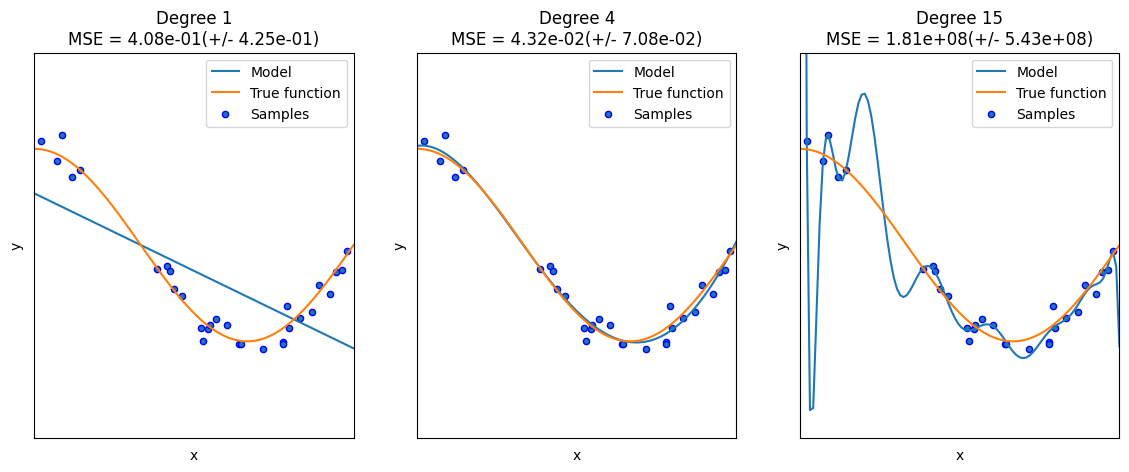

In [28]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    print(f"model {i} metrics: \n")
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

    print_metrics(true_fun(X_test), pipeline.predict(X_test[:, np.newaxis]))
plt.show()

Advantages of using Polynomial Regression:

- Polynomial provides the best approximation of the relationship between the dependent and independent variable.
A Broad range of function can be fit under it.
Polynomial basically fits a wide range of curvature.

Disadvantages of using Polynomial Regression

- The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
These are too sensitive to the outliers.
In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

## Self practice

Load the full CarPrice dataset and handle the remaining features, try standardisation instead of MinMax normalization and observe the result, comment on the result, is it better or worse with the added features and standardisation? and what contributed to the change, the increase of the features or the change in normalization technique

References
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
- https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html
- https://medium.com/@madanflies/linear-regression-on-carprice-dataset-or-encoding-a-categorical-dataset-in-linear-regression-7378f207e5c1
- https://www.investopedia.com/terms/c/coefficient-of-determination.asp
- https://ai-ml-analytics.com/encoding/#:~:text=Encoding%20is%20a%20technique%20of,to%20a%20machine%20learning%20model.